In [201]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn.model_selection as model_selection

## Partie 1 : Réegression linèaire simple

In [202]:
#  advertising.scv dataset
data_advertising = pd.read_csv("data/advertising.csv")
data_advertising.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [203]:
data_advertising.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [204]:
# Initialization of variables (X, Y) : X=TV and Y=Sales
X = data_advertising['TV'].values
Y = data_advertising['Sales'].values

In [205]:
# Pourquoi il s’agit d’un probleme de regression
# 2. On cherche à prédire une valeur continue   (Sales)

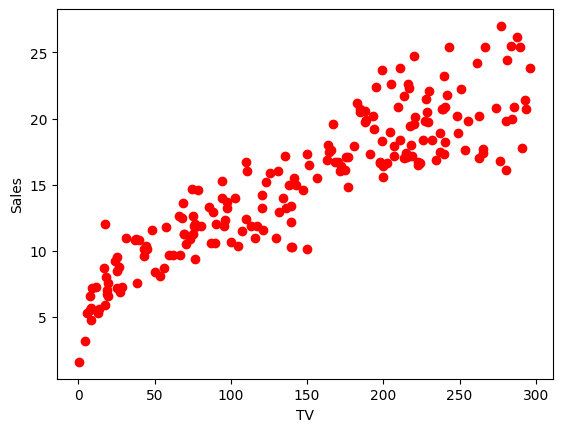

In [206]:
# Visualiser la base de donnees avec matplotlib.
plt.scatter(X,Y, c="r")
plt.xlabel('TV')
plt.ylabel('Sales')
plt.show()
# On remarque que les données sont linéairement corrélées

In [207]:
# (80% pour la base d’apprentissage et 20% pour la base de test )
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size=0.2)

In [208]:
# Definir une fonction MSE(X,y,W) qui retourne la moyenne des erreurs entre la valeur theorique et la valeur reelle.
def MSE(X, y, W):
    error = y -  X @ W
    return np.mean(error**2)

# La MSE est une fonction de coût qui permet de mesurer la qualité d'un modèle de régression.
# Elle est définie comme la moyenne des carrés des erreurs de prédiction.
# Elle permet de mesurer la distance entre les valeurs prédites et les valeurs réelles.

In [209]:
# Definir la fonction Gradient(X,y,W).
def Gradient(X, y, W):
    error=y-X@W
    return X.T@error

In [210]:
# Etablir une fonction de mise `a jour des param`etres W MiseJour(grad,W,alpha).
def MiseJour(grad, W, alpha):
    return W - alpha * grad

In [211]:
# Ecrire la fonction Batch Gradient Descent(X,y,W,N max,alpha,eps)

def Batch_Gradient_Descent(X,y,W,N_max,alpha,eps):
    listMse=[]
    for _ in range(N_max):
        mse=MSE(X,y,W)
        grad=Gradient(X,y,W)
        W=MiseJour(grad,W,alpha)
        listMse.append(mse)
        if(mse<eps):
            return W,listMse
    return W,listMse


In [212]:
X_train = X_train.reshape(-1, 1)
W = np.zeros(X_train.shape[1])
W, MSE_list = Batch_Gradient_Descent(X_train, Y_train, W, 10, 0.01, 0.0001)
print(MSE_list)

[256.908, 526308902147.1247, 1.1615584317439147e+21, 2.5635477281466873e+30, 5.657723946456535e+39, 1.2486539611825047e+49, 2.755766682029892e+58, 6.081949236435459e+67, 1.3422800542508556e+77, 2.9623985238910653e+86]


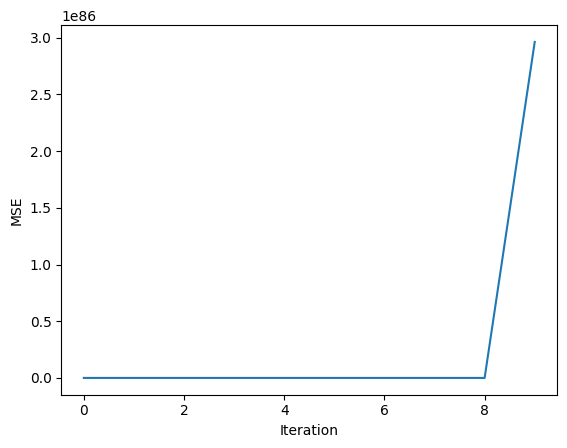

In [213]:
# Tracer l’MSE


plt.plot(MSE_list)
plt.xlabel('Iteration')
plt.ylabel('MSE')
plt.show()

In [214]:
# Donner l’erreur de ce modele.
print(MSE(X_train,Y_train,W))

6.537983624624343e+95


## Partie 2 : Regression lineaire multiple

## Probleme 2 : Regression logistique

In [215]:
def sigmoid(X,W):
    z=X@W
    return 1/(1+np.exp(-z))

## Probleme 3 : K_means

In [216]:
from sklearn.datasets import make_blobs
from scipy.spatial import distance

In [217]:
# Data
centers=[[1,2],[3,4]]
data,labels=make_blobs(centers=centers,n_samples=10)

In [218]:
def cluster(data,labels):
    cluster=[[] for _ in range(2)]
    for i in range(data.shape[0]):
        cluster[labels[i]].append(data[i])
    return cluster

In [219]:
cluster(data,labels)

[[array([-0.41364067,  0.94110685]),
  array([0.48160835, 1.79432578]),
  array([1.81625159, 1.03660322]),
  array([0.52035798, 1.93501299]),
  array([2.02834065, 1.23960075])],
 [array([4.24488611, 3.55057598]),
  array([4.05947071, 4.75940963]),
  array([2.0842388 , 3.45835103]),
  array([2.76650057, 5.91791857]),
  array([2.16446085, 2.77508348])]]

In [220]:
def InertieIntraClass(cluster):
    inertie=0
    dataSize=0
    for cl in cluster:
        for x in cl:
            for y in cl:
                inertie+=distance.euclidean(x,y)**2
        dataSize+=len(cl)
        inertie=inertie/(2 * dataSize)
    return inertie/dataSize
    

In [221]:
InertieIntraClass(cluster=cluster(data,labels))

0.5474004813181594

In [222]:
def inter_clas(cluster):
    inertie=0
    for c1 in cluster:
        ic=0
        for x in c1:
            ic=ic+distance.euclidean(x,np.mean(c1,axis=0))**2
        inertie=inertie+ic/len(c1)
    return inertie/len(cluster)

In [223]:
inter_clas(cluster=cluster(data,labels))

1.5417528048544626

In [224]:
inter_clas(cluster=cluster(data,labels))+InertieIntraClass(cluster=cluster(data,labels))

2.089153286172622

In [225]:
def InertieTotal(data):
    inertie=0
    for x in data:
        for y in data:
            inertie+=distance.euclidean(x,y)**2
    return inertie/(2 * len(data))

In [226]:
def InertieTotal2(data):
    inerie_totale = 0
    for i in range(len(data)):
        inerie_totale += distance.euclidean(data[i], np.mean(data, axis=0))**2
    return inerie_totale

In [ ]:
def affectation():
    